In [1]:
from functions import *
import matplotlib.pyplot as plt
import scipy.optimize as op
from scipy.integrate import odeint

In [45]:
#function to get recomb rate coefficient
def get_a(z):
    a_guess = np.array([2e-13, 0.8])
    z_fit = np.linspace(600, 1700, 1000)
    a_data = a_ex(z_fit)
    fit_a, cov_a = op.curve_fit(exp_fit, z_fit, a_data, a_guess)
    return exp_fit(z, fit_a[0], fit_a[1])
#function to get dx/dz
def diff_X(z, X):
    a = get_a(z)
    n_g = ng(z)
    ba = b_over_a(z)
    k = K(z)
    rate_a = a*X*X*eta*n_g
    rate_b = ba*a*np.exp(-ly/Temp(z))*(1-X)
    prefactor = 1/((1+z)*Hubble(z))
    C1 = 1+Lambda*k*(1-X)*n_g*eta
    C2 = 1+Lambda*k*(1-X)*n_g*eta*(Lambda+ba*a)
    return prefactor*(rate_a-rate_b)*C1/C2
#function to get X(z)
def get_X(z):
    sol_x = odeint(diff_X, saha(z[0]), z, tfirst = True)
    return sol_x[:,0]
#rate of recombination
def Gam_H(z):
    X = get_X(z)
    a = get_a(z)
    return X*eta*ng(z)*a
#rate of thomson scattering
def Gam_Th(z):
    X = get_X(z)
    s = 8*pi*(q*q/(m*c))**2/3
    return X*eta*ng(z)*s/c

In [55]:
z = np.linspace(1700,400,1000)
gh = Gam_H(z)
hu = Hubble(z)
gth = Gam_Th(z)

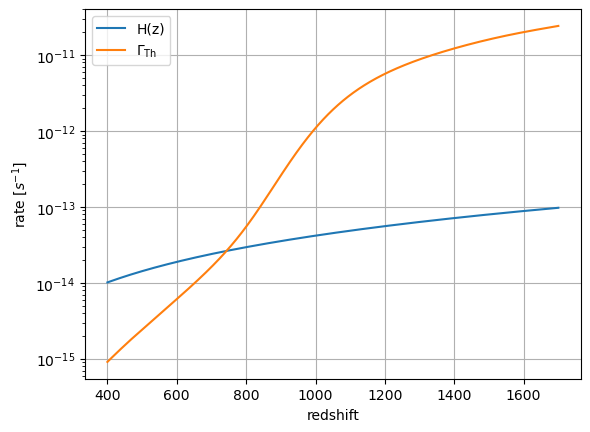

In [57]:
#plt.plot(z, gh, label='$\Gamma_{\mathrm{rec}}$')
plt.plot(z, hu, label='H(z)')
plt.plot(z, gth, label='$\Gamma_{\mathrm{Th}}$')
plt.yscale('log')
plt.ylabel('rate [$s^{-1}$]')
plt.xlabel('redshift')
plt.legend()
plt.grid()
plt.savefig('Images/thomson rates.png', dpi=300)
plt.show()

In [54]:
#freeze-out of thomson scat
delt_th = gth-hu
for i in range(len(z)-1, 0, -1):
    if delt_th[i] >= 0:
        print('Thomson freeze-out at z = ',z[i])
        print(delt_th[i])
        break

Thomson freeze-out at z =  743.3540935409353
5.849232649931324e-19


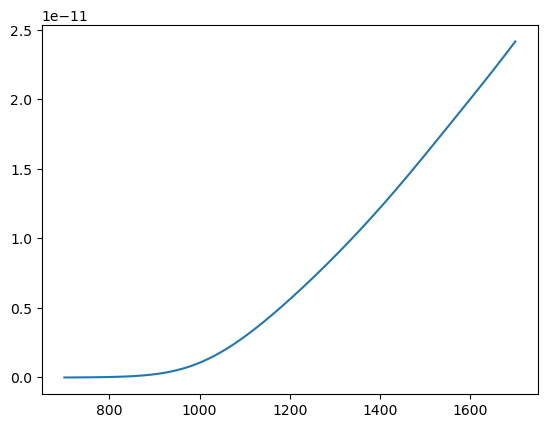

In [42]:
#plt.plot(z, Gam_Th(z))
plt.plot(z, delt_th)

In [39]:
print(Hubble(700))
print(gth)
print(z)

2.399952658478293e-14
[2.42449797e-11 2.41585256e-11 2.40721739e-11 2.39859910e-11
 2.38999753e-11 2.38141255e-11 2.37284394e-11 2.36429159e-11
 2.35575531e-11 2.34723494e-11 2.33873026e-11 2.33024111e-11
 2.32176729e-11 2.31330861e-11 2.30486484e-11 2.29643579e-11
 2.28802123e-11 2.27962095e-11 2.27123471e-11 2.26286227e-11
 2.25450339e-11 2.24615782e-11 2.23782531e-11 2.22950558e-11
 2.22119836e-11 2.21290337e-11 2.20462031e-11 2.19634892e-11
 2.18808893e-11 2.17984003e-11 2.17160188e-11 2.16337418e-11
 2.15515658e-11 2.14694878e-11 2.13875047e-11 2.13056133e-11
 2.12238103e-11 2.11420920e-11 2.10604550e-11 2.09788960e-11
 2.08974114e-11 2.08159980e-11 2.07346523e-11 2.06533712e-11
 2.05721512e-11 2.04909890e-11 2.04098815e-11 2.03288253e-11
 2.02478172e-11 2.01668542e-11 2.00859332e-11 2.00050509e-11
 1.99242048e-11 1.98433923e-11 1.97626107e-11 1.96818577e-11
 1.96011309e-11 1.95204283e-11 1.94397478e-11 1.93590874e-11
 1.92784455e-11 1.91978204e-11 1.91172108e-11 1.90366155e-11
 1